# I. Mount Google Drive


To run `vnquant` package in google drive needs mounting to a google drive that store code and data inside. That enable Google colab 's Virtual Machine to execute our code and justify our data.   

![](https://imgur.com/kpeMAsi.png)

In [1]:
from google.colab import drive
import os

drive.mount("/content/gdrive", force_remount=True)
path = "/content/gdrive/"
!ls

Mounted at /content/gdrive
drive  gdrive  sample_data  vnquant


# II. Install vnquant package

First, cloning [vnquant repository](https://github.com/phamdinhkhanh/vnquant) and installing it right in your mounted folder. After successful installation, DataScientists/AI Engineers are able to use `vnquant` to get data, visualization and execute financial analysis in your google colab runtime session.

In [2]:
!git clone https://github.com/phamdinhkhanh/vnquant
%cd vnquant
!python setup.py install

fatal: destination path 'vnquant' already exists and is not an empty directory.
/content/vnquant
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        I

Remove folder vnquant because it was installed inside repository

In [3]:
%cd ..
!rm -rf vnquant
!ls

/content
drive  gdrive  sample_data


test package

In [7]:
!pip freeze | grep vnquant

vnquant==0.1.2


In [8]:
import vnquant
vnquant.__version__

'0.1.2'

# III. Introduction

The main features `vnquant` support you to progress were:

*   **Loading dataset**:
  *   Stock prices from `CAFE, VND` sources.
  *   Business prices: balance sheet, business, cashflow report.

*   **Visualization**:
  *   Candlestick charts of stock prices.
  *   Advanced stock indices: MACD, RSI, Stochastic.



## Loading price dataset

In [9]:
import vnquant.data as dt

loader = dt.DataLoader(symbols="TCB",
           start="2022-01-01",
           end="2022-10-01",
           minimal=True,
           data_source="cafe")

data = loader.download()
data.head()

[2024-11-30 01:20:32] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['TCB'] from CAFEF, start: 01/01/2022, end: 01/10/2022!
[2024-11-30 01:20:33] - Assitant - INFO      - download_one - line 94 - data TCB from 2022-01-01 to 2022-10-01 have already cloned!


Attributes,code,high,low,open,close,adjust,volume_match,value_match
Symbols,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB
date,,,,,,,,
2022-09-30,TCB,33.20,32.20,33.00,32.50,15.76,5240200.0,1.712690e+11
2022-09-29,TCB,33.70,33.00,33.70,33.00,16.00,2640300.0,8.787900e+10
2022-09-28,TCB,33.70,33.20,33.35,33.25,16.12,2069900.0,6.914200e+10
2022-09-27,TCB,33.90,33.20,33.55,33.50,16.24,2336300.0,7.835800e+10
2022-09-26,TCB,33.85,32.95,33.85,33.25,16.12,5217000.0,1.734440e+11


**Arguments**

* `symbols`: a string or list of strings indicates the stock symbols that regularly include 3 upper-case letters except for several special cases, which are compounded symbols, such as: `E1VFVN30, VN100-INDEX, HNX-INDEX, HNX30-INDEX, UPCOM-INDEX` in case your `data_source = "cafe"` and `VN30, HNX30, UPCOM` in case your `data_source = "vnd"`.
* `start`: start date time with format `yyyy-mm-dd`.
* `end`: end date time with format `yyyy-mm-dd`.
* `minimal`: default is True, we only clone `high, low, open, close, adjust price, volume` information. By contrast, more information is added likes `volumn_reconcile, volumn_match`
* `data_source`: website where clones the data. Currently, there are two main resources [VNDIRECT](https://trade.vndirect.com.vn/chung-khoan/danh-muc) and [CAFEF](https://liveboard.cafef.vn/) showed by `data_source = vnd` and `cafe`, respectively. The default is `vnd`.

In [10]:
# If you want to get full dataset, change minimal = False
import vnquant.data as dt

loader = dt.DataLoader(symbols="TCB",
           start="2022-01-01",
           end="2022-10-01",
           minimal=False,
           data_source="cafe")

data = loader.download()
data.head()

[2024-11-30 01:20:36] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['TCB'] from CAFEF, start: 01/01/2022, end: 01/10/2022!
[2024-11-30 01:20:37] - Assitant - INFO      - download_one - line 94 - data TCB from 2022-01-01 to 2022-10-01 have already cloned!


Attributes,code,close,open,high,low,adjust_price,change,percent_change,volume_match,value_match,volume_reconcile,value_reconcile,total_volume,total_value
Symbols,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB
date,,,,,,,,,,,,,,
2022-09-30,TCB,32.50,33.00,33.20,32.20,15.76,-0.50,-1.52,5240200.0,1.712690e+11,1132000.0,3.865600e+10,6372200.0,2.099250e+11
2022-09-29,TCB,33.00,33.70,33.70,33.00,16.00,-0.30,-0.90,2640300.0,8.787900e+10,1480000.0,5.261400e+10,4120300.0,1.404930e+11
2022-09-28,TCB,33.25,33.35,33.70,33.20,16.12,-0.25,-0.75,2069900.0,6.914200e+10,0.0,0.000000e+00,2069900.0,6.914200e+10
2022-09-27,TCB,33.50,33.55,33.90,33.20,16.24,0.20,0.60,2336300.0,7.835800e+10,2715147.0,9.319323e+10,5051447.0,1.715512e+11
2022-09-26,TCB,33.25,33.85,33.85,32.95,16.12,-0.95,-2.78,5217000.0,1.734440e+11,0.0,0.000000e+00,5217000.0,1.734440e+11


Fortunately, `vnquant` support you clone `multiple stock indices` by listing out all of them in `symbols` argument in a list.

In [12]:
import vnquant.data as dt

loader = dt.DataLoader(symbols=["TCB", "VCB"],
           start="2022-01-01",
           end="2022-10-01",
           minimal=True,
           data_source="cafe")

data = loader.download()
data.head()

[2024-11-30 00:52:40] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['TCB', 'VCB'] from CAFEF, start: 01/01/2022, end: 01/10/2022!
[2024-11-30 00:52:41] - Assitant - INFO      - download_one - line 94 - data TCB from 2022-01-01 to 2022-10-01 have already cloned!
[2024-11-30 00:52:43] - Assitant - INFO      - download_one - line 94 - data VCB from 2022-01-01 to 2022-10-01 have already cloned!


Attributes code        high          low         open        close        \
Symbols     TCB  VCB    TCB   VCB    TCB   VCB    TCB   VCB    TCB   VCB   
date                                                                       
2022-09-30  TCB  VCB  33.20  74.3  32.20  72.4  33.00  73.2  32.50  73.2   
2022-09-29  TCB  VCB  33.70  76.0  33.00  74.0  33.70  76.0  33.00  74.0   
2022-09-28  TCB  VCB  33.70  75.0  33.20  73.8  33.35  74.0  33.25  75.0   
2022-09-27  TCB  VCB  33.90  76.0  33.20  74.2  33.55  76.0  33.50  74.3   
2022-09-26  TCB  VCB  33.85  77.0  32.95  74.1  33.85  75.1  33.25  75.0   

Attributes adjust        volume_match              value_match                
Symbols       TCB    VCB          TCB        VCB           TCB           VCB  
date                                                                          
2022-09-30  15.76  61.98    5240200.0  1262400.0  1.712690e+11  9.265600e+10  
2022-09-29  16.00  62.66    2640300.0   587800.0  8.787900e+10  4.405500e+10  
2022-09-28  16.12  63.50    2069900.0   587700.0  6.914200e+10  4.360700e+10  
2022-09-27  16.24  62.91    2336300.0   653400.0  7.835800e+10  4.894700e+10  
2022-09-26  16.12  63.50    5217000.0  1255900.0  1.734440e+11  9.448300e+10

To manipulate above dataframe, you should consider study pandas [DataFrame - tutorial - ML algorithms to practices book - phamdinhkhanh](https://phamdinhkhanh.github.io/deepai-book/ch_appendix/index_pandas.html).

## Loading report dataset

`vnquant` advocate loading basic indexs such as: `ROA, ROE, Net Profit Marget, Net Revenue Growth, Profit After tax Growth`



In [11]:
import vnquant.data as dt
loader = dt.FinanceLoader('TCB', '2018-06-02','2022-10-30', minimal=True)
data_basic = loader.get_basic_index()
data_basic.head()

,2022-12,2021-12,2020-12,2019-12,2018-12
index,,,,,
Tăng trưởng Doanh thu thuần 4 quý liền kề so với cùng kỳ năm trước,0.134507,0.423834,0.315150,0.251793,0.275410
ROAE,0.193967,0.215403,0.181615,0.177983,0.198433
Tăng trưởng Vốn chủ sở hữu so với đầu năm,0.219080,0.246958,0.202053,0.198716,0.922810
ROAA,0.031702,0.035859,0.030622,0.028639,0.028673


## Visualization

Visualization is a critical and important core functions of `vnquant` package. By visualization, quantitative experts/investors are able to analyze the trend and estimate which are suitable `bid and ask` points. Basic graph we are supplying now is candle-stick graph.

In [12]:
from vnquant import plot as pl
pl.vnquant_candle_stick(data='TCB',
                        title='TCB symbol from 2022-01-01 to 2022-10-01',
                        xlab='Date', ylab='Price',
                        start_date='2022-01-01',
                        end_date='2022-10-01',
                        data_source='cafe',
                        show_advanced=['volume', 'macd', 'rsi'])

[2024-11-30 01:20:55] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['TCB'] from CAFEF, start: 01/01/2022, end: 01/10/2022!
[2024-11-30 01:20:56] - Assitant - INFO      - download_one - line 94 - data TCB from 2022-01-01 to 2022-10-01 have already cloned!


we could setup to only show several indices by `show_advanced` argument:

In [15]:
from vnquant import plot as pl
pl.vnquant_candle_stick(data='TCB',
                        title='TCB symbol from 2022-01-01 to 2022-10-01',
                        xlab='Date', ylab='Price',
                        start_date='2022-01-01',
                        end_date='2022-10-01',
                        data_source='cafe',
                        show_advanced=['volume', 'macd'])

[2024-11-30 01:23:36] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['TCB'] from CAFEF, start: 01/01/2022, end: 01/10/2022!
[2024-11-30 01:23:38] - Assitant - INFO      - download_one - line 94 - data TCB from 2022-01-01 to 2022-10-01 have already cloned!


Thanks [Ha Anh Nguyen](https://www.facebook.com/nguyenhaanh.95) to join with me in computing advanced metrics.

## Data by industry

`vnquant` also support to get stock price according to industry based on industry code.

For example, to find all index in the same industry with `TCB`:

In [16]:
from vnquant import utils
meta = utils.get_ind_class(code_list=["TCB"])

BASE_URL:  https://finfo-api.vndirect.com.vn/v4/industry_classification
payload_str:  q=codeList:TCB~industryCode:~industryLevel:~higherLevelCode:~englishName:~vietnameseName:&size=9999
header:  {'content-type': 'application/json', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36'}


**Arguments**:
* `code_list`: list of str - tickers
* `industry_codes`: list of str - industry codes
* `industry_levels`: list of str - industry levels
* `higher_level_codes`: list of str - higher industry level's codes
* `english_name`: str - part of the industry's English name to query for
* `vietnamese_name`: str - part of the industry's Vietnamese name to query for
* `result_size`: int - the number of industry to include on 1 result page


The result returns would be a `codeList` according to their level. High level is more specific sectors.

In [17]:
meta['data']

[{'industryCode': '8300',
  'industryLevel': '2',
  'higherLevelCode': '8000',
  'englishName': 'Banks',
  'vietnameseName': 'Ngân hàng',
  'totalCount': 44.0,
  'codeList': 'ACB,STB,BID,SSB,HDB,MBB,BVB,ABB,PNB,VCB,BAB,PGB,TPB,VRB,OCB,DAB,TB,NAB,MSB,EIB,VAB,TCB,SGB,AGRB,KLB,MXBANK,VNDB,LPB,VIB,EAB,CTG,DCB,NVB,PACB,VBB,VPBF,GB,SCB,WEB,FCB,MHBB,SHB,MDB,VPB',
  'taxCodeList': 't0301179079,t2200269805,t0103012929,t0300608092,t3602983289,t2900325526,t0100233488,t0100150619,t0102744865,t0102360026,t6300048638,t0302963695,t0100233583,t0301378892,t0301452948,t1800278630,t0200253985,t0100230800,t0300852005,t0300610480,t1600169112,t0100111948,t1700197787,t5400104411-007,t0100283873,t0200124891,t0301442379,t0311288990,t0301103908,t1400116233,t1700169765,t0100112437,t0101382193,t0800006089,t0301412222,t0300872315,t0311449990'},
 {'industryCode': '8350',
  'industryLevel': '3',
  'higherLevelCode': '8300',
  'englishName': 'Banks',
  'vietnameseName': 'Ngân hàng',
  'totalCount': 44.0,
  'codeList'

Based on `codeList` you can clone dataset belongs to one industry.

In [18]:
import random
# randomly get 5 symbols in `Banks` sector:
codeList = meta['data'][1]['codeList'].split(',')
random.shuffle(codeList)
# codeList5 = codeList[:5]
codeList5 = ['VCB', 'VBB', 'HDB', 'SSB', 'MBB']
codeList5

['VCB', 'VBB', 'HDB', 'SSB', 'MBB']

Clone dataset of this code list in 2022

In [20]:
import vnquant.data as dt

loader = dt.DataLoader(symbols=codeList5,
           start="2022-01-01",
           end="2022-10-01",
           minimal=True,
           data_source="cafe")

data = loader.download()
data.head()

[2024-11-30 01:24:18] - Assitant - INFO      - download - line 34 - Start downloading data symbols ['VCB', 'VBB', 'HDB', 'SSB', 'MBB'] from CAFEF, start: 01/01/2022, end: 01/10/2022!
[2024-11-30 01:24:20] - Assitant - INFO      - download_one - line 94 - data VCB from 2022-01-01 to 2022-10-01 have already cloned!
[2024-11-30 01:24:21] - Assitant - INFO      - download_one - line 94 - data VBB from 2022-01-01 to 2022-10-01 have already cloned!
[2024-11-30 01:24:22] - Assitant - INFO      - download_one - line 94 - data HDB from 2022-01-01 to 2022-10-01 have already cloned!
[2024-11-30 01:24:23] - Assitant - INFO      - download_one - line 94 - data SSB from 2022-01-01 to 2022-10-01 have already cloned!
[2024-11-30 01:24:24] - Assitant - INFO      - download_one - line 94 - data MBB from 2022-01-01 to 2022-10-01 have already cloned!


Attributes code                      high                            ...  \
Symbols     VCB  VBB  HDB  SSB  MBB   VCB  VBB    HDB    SSB    MBB  ...   
date                                                                 ...   
2022-09-30  VCB  VBB  HDB  SSB  MBB  74.3  8.9  19.40  30.60  20.00  ...   
2022-09-29  VCB  VBB  HDB  SSB  MBB  76.0  9.1  19.35  30.65  20.25  ...   
2022-09-28  VCB  VBB  HDB  SSB  MBB  75.0  9.0  19.25  30.60  20.25  ...   
2022-09-27  VCB  VBB  HDB  SSB  MBB  76.0  9.1  19.50  30.55  20.35  ...   
2022-09-26  VCB  VBB  HDB  SSB  MBB  77.0  9.1  24.15  31.00  20.90  ...   

Attributes volume_match                                             \
Symbols             VCB      VBB        HDB        SSB         MBB   
date                                                                 
2022-09-30    1262400.0   9864.0  2310500.0  1152000.0   7530200.0   
2022-09-29     587800.0  33596.0  1383700.0  1160100.0   4316000.0   
2022-09-28     587700.0  39600.0   866700.0  1300000.0   3502300.0   
2022-09-27     653400.0   9909.0  1594200.0  1316300.0   3977700.0   
2022-09-26    1255900.0  12000.0  2621100.0  1075900.0  10186800.0   

Attributes   value_match                                           \
Symbols              VCB          VBB           HDB           SSB   
date                                                                
2022-09-30  9.265600e+10   86587300.0  4.389300e+10  3.505700e+10   
2022-09-29  4.405500e+10  300631800.0  2.657800e+10  3.541000e+10   
2022-09-28  4.360700e+10  349880000.0  1.647100e+10  3.948600e+10   
2022-09-27  4.894700e+10   88561000.0  3.051900e+10  4.005400e+10   
2022-09-26  9.448300e+10  106352400.0  6.194900e+10  3.276100e+10   

Attributes                
Symbols              MBB  
date                      
2022-09-30  1.481610e+11  
2022-09-29  8.622600e+10  
2022-09-28  7.026500e+10  
2022-09-27  8.023100e+10  
2022-09-26  2.052050e+11  

[5 rows x 40 columns]

Visualize stock prices of this company during 2022.

<Axes: xlabel='date'>

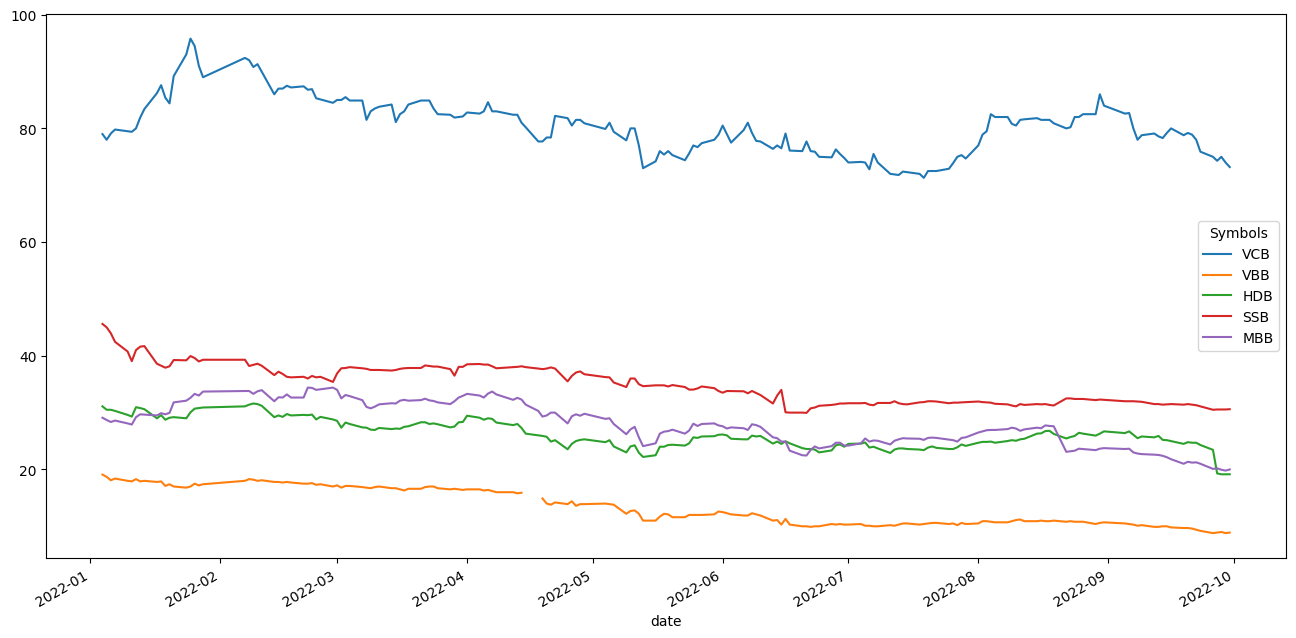

In [21]:
data['close'].plot(figsize = (16, 8))

Thanks [Viet Anh Tran](https://www.facebook.com/vietzerg) to join with me doing this feature.

# VI. Quantitative analysis

## Compute daily return

In [22]:
import numpy as np

df_return = np.log(data['close']/data['close'].shift(1))
df_return.dropna(inplace=True)
df_return.head()

Symbols,VCB,VBB,HDB,SSB,MBB
date,,,,,
2022-09-29,0.010870,-0.011300,0.000000,-0.001635,-0.010050
2022-09-28,0.013423,0.022473,0.000000,0.000000,0.007547
2022-09-27,-0.009377,-0.011173,0.007802,0.000000,0.012453
2022-09-26,0.009377,-0.011300,0.194765,-0.001638,-0.004963
2022-09-23,0.011929,0.044452,0.035606,0.019481,0.043803


## Descriptive statistic

In [23]:
df_return.describe()

Symbols,VCB,VBB,HDB,SSB,MBB
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.000193,0.003882,0.002401,0.002143,0.001542
std,0.017491,0.025412,0.024989,0.018314,0.025659
min,-0.055314,-0.092659,-0.064539,-0.048729,-0.066822
25%,-0.008850,-0.009412,-0.009814,-0.003161,-0.010669
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010949,0.014824,0.010501,0.006528,0.009607
max,0.053346,0.123233,0.194765,0.123498,0.177983


## EDA (Exploratory Data Analysis)


In [35]:
# !pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install ydata-profiling

In [45]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(df_return, title='Banking return report')
# profile.to_file(output_file="name of html file.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Estimate confident interval

Set: $r_t = \log(\frac{X_t}{X_{t-1}})$

$x_t = \frac{r_t-\bar{r}}{\sigma_{r}}$ will follow `Student's t` with $n-1$ degree.

In [39]:
import scipy.stats as st

# create 95% confidence interval
for sym in codeList5:
  rt = df_return[sym].dropna()
  interval = st.t.interval(
      confidence=0.95, df=df_return.shape[0]-1,
      loc=np.mean(rt),
      scale=st.sem(rt))
  print('95% confidence interval of {} is {}'.format(sym, interval))

95% confidence interval of VCB is (-0.0023801285964513154, 0.0027652234209059588)
95% confidence interval of VBB is (0.00014397134660915252, 0.007619130453832154)
95% confidence interval of HDB is (-0.001273940101780517, 0.00607684421370399)
95% confidence interval of SSB is (-0.0005507386181052075, 0.004836459774521237)
95% confidence interval of MBB is (-0.002232160594202462, 0.005315784887734313)


## Hypothesis testing:


### Augmented Dickey-Fuller Unit Root Test

Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

_Assumptions_

* Observations in are temporally ordered.

_Interpretation_

* H0: a unit root is present (series is non-stationary).
* H1: a unit root is not present (series is stationary).

In [40]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
stat, p, lags, obs, crit, t = adfuller(df_return['VCB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-10.970, p=0.000
Probably Stationary


### Normality test
_Shapiro-Wilk Test_

Tests whether a data sample has a Gaussian distribution.

_Assumptions_

* Observations in each sample are independent and identically distributed (iid).

_Interpretation_

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

Python Code

In [41]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df_return['VCB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.985, p=0.047
Probably not Gaussian


### Correlation test

**Pearson’s Correlation Coefficient**

Tests whether two samples have a linear relationship.

_Assumptions_

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

_Interpretation_

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

Python Code

In [42]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(df_return['VCB'], df_return['MBB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.407, p=0.000
Probably dependent


### Parametric Statistical Hypothesis Tests

#### Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

*Assumptions*

* Observations in each sample are independent and
* identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

*Interpretation*

* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.

For example: Check whether mean return of `VBB` and `VCB` are equal?

$$\begin{split}
\left\{
\begin{matrix}
H_0: r_{VBB} = r_{VCB} \\
H1: r_{VBB} \neq r_{VCB}
\end{matrix}
\right.\end{split}
$$

In [43]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway

stat, p = f_oneway(df_return['VBB'], df_return['VCB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2.574, p=0.110
Probably the same distribution


### Nonparametric Statistical Hypothesis Tests

#### Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

_Assumptions_

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

_Interpretation_

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

Python Code

In [44]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
stat, p = wilcoxon(df_return['VBB'], df_return['VCB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=6780.000, p=0.136
Probably the same distribution
